Code, which I sent to ChatGPT for optimization.

In [4]:
"""
Eternas game
"""
import random


def check_combination(board: list[list], hor_index: int, ver_index: int, hor: int, ver: int):
    """
    (list, int, int, int, int) -> list

    Checks for winning combinations on the board.
    Returns a list with winning combination indexes.

    >>> check_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0, 0, 4, 1)
    []
    >>> check_combination(([[0, 0, 0, 'w'], [0, 'g', 'g', 'w'], [0, 0, 'w', 'w'], \
[0, 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 0, 0], \
[0, 'w', 'w', 'w'], ['g', 'w', 'w', 'g'], [0, 0, 0, 0], [0, 0, 0, 'g'], [0, 0, 'g', 'g'], \
['g', 'g', 'w', 'w'], [0, 0, 'g', 'w']]), 0, 3, 4, 1)
    [(3, 0), (3, 1), (3, 2), (3, 3)]
    """
    item = board[hor_index][ver_index]
    if item == 0:
        return []
    combination = []
    for i in range(hor_index, hor_index+hor):
        for j in range(ver_index, ver_index+ver):
            if board[i % len(board)][j] != item:
                return []
            combination.append((j, i % len(board)))
    return combination
def check_diagonal_combination(board: list[list], hor_index: int):
    """
    (list, int) -> list

    Checks for winning diagonal combinations on the board.
    Returns a list with winning combination indexes.

    >>> check_diagonal_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    []
    >>> check_diagonal_combination([['w', 'g', 'g', 'w'], [0, 'w', 'g', 'g'], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    [(0, 0), (1, 1), (2, 2), (3, 3)]
    """
    item = board[hor_index][0]
    if item == 0:
        return []
    combination = []
    for i in range(0, 4):
        if board[(hor_index+i) % len(board)][i] != item:
            return []
        combination.append((i, (hor_index+i) % len(board)))
    return combination
def check_reverse_diagonal_combination(board: list[list], hor_index: int):
    """
    (list, int) -> list

    Checks for winning reverse diagonal combinations on the board.
    Returns a list with winning combination indexes.
    >>> check_reverse_diagonal_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], \
[0, 'g', 'w', 'g'], ['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], \
[0, 0, 0, 0], [0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'],\
[0, 0, 'g', 'w'], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    []
    >>> check_reverse_diagonal_combination([['g', 'g', 'g', 'w'], [0, 'g', 'w', 'g'], \
[0, 'w', 'w', 'g'], ['w', 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], \
[0, 0, 0, 0], [0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'],\
[0, 0, 'g', 'w'], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    [(0, 3), (1, 2), (2, 1), (3, 0)]
    """
    item = board[hor_index][3]
    if item == 0:
        return []
    combination = []
    for i in range(3, -1, -1):
        if board[(hor_index+i) % len(board)][3-i] != item:
            return []
        if hor_index+i >= 0:
            combination.append((3-i, hor_index+i))
        else:
            combination.append((3-i, (16 + i - hor_index) % len(board)))
    return combination
def winning_combination(board: list[list]) -> bool:
    """
    (list) -> bool
    Checks for winning combinations on the board.
    Returns a bool value of True and all winning positions if there is winning combination
    or False if not.
    >>> winning_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']])
    False
    >>> winning_combination([[0, 0, 0, 'w'], [0, 'g', 'g', 'w'], [0, 0, 'w', 'w'], \
[0, 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 0, 0], \
[0, 'w', 'w', 'w'], ['g', 'w', 'w', 'g'], [0, 0, 0, 0], [0, 0, 0, 'g'], [0, 0, 'g', 'g'], \
['g', 'g', 'w', 'w'], [0, 0, 'g', 'w']])
    (True, [[(3, 0), (3, 1), (3, 2), (3, 3)], [(3, 14), (3, 15), (3, 0), (3, 1)], \
[(3, 15), (3, 0), (3, 1), (3, 2)]])
    
    """
    winning_combinations = []
    for i in range(0, 16):
        for j in range(0, 4):
            combination = check_combination(board, i, j, 4, 1)
            if combination:
                winning_combinations.append(combination)
        combination = check_combination(board, i, 0, 1, 4)
        if combination:
            winning_combinations.append(combination)
        combination = check_diagonal_combination(board, i)
        if combination:
            winning_combinations.append(combination)
        combination = check_reverse_diagonal_combination(board, i)
        if combination:
            winning_combinations.append(combination)
    if len(winning_combinations) == 0:
        return False
    return True, winning_combinations

def board_generation() -> list[list]:
    """
    Generates a game board of 16 x 4 size, i.e. two dimensional list (array) of
    'g's, 'w's and '0's  that is used for the game.

    ### 16 x 4 | g - green, w - white, 0 - whitespace
        e.g. [[0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 'g', 'g'],
          [0, 'w', 'w', 'w'], [0, 0, 'w', 'g'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'],
          [0, 'g', 'g', 'w'], [0, 0, 0, 0], ['w', 'g', 'w', 'w'], [0, 0, 0, 'g'],
          [0, 0, 0, 'g'], ['w', 'g', 'g', 'w'], [0, 'w', 'w', 'w'], [0, 0, 'g', 'w']]

    """
    board = []
    i = 0
    while i < 16:
        board.insert(0, [0, 0, 0, 0])
        i += 1

    balls_count = random.randint(0, 32)
    ball_color = 'w'
    while balls_count != 0:
        while True:
            pos = random.randint(0, 15)
            ball_pos = 3
            is_success = False
            while ball_pos != 0:
                if board[pos][ball_pos] == 0:
                    board[pos][ball_pos] = ball_color
                    is_success = True
                    break
                ball_pos -= 1

            if is_success:
                break

        balls_count -= 1
        if ball_color == 'w':
            ball_color = 'g'
        else:
            ball_color = 'w'

        if winning_combination(board):
            break
    return board

Initially, I thought to optimize the entire codebase, and I just write
"Optimize" and attached code below.

The response was
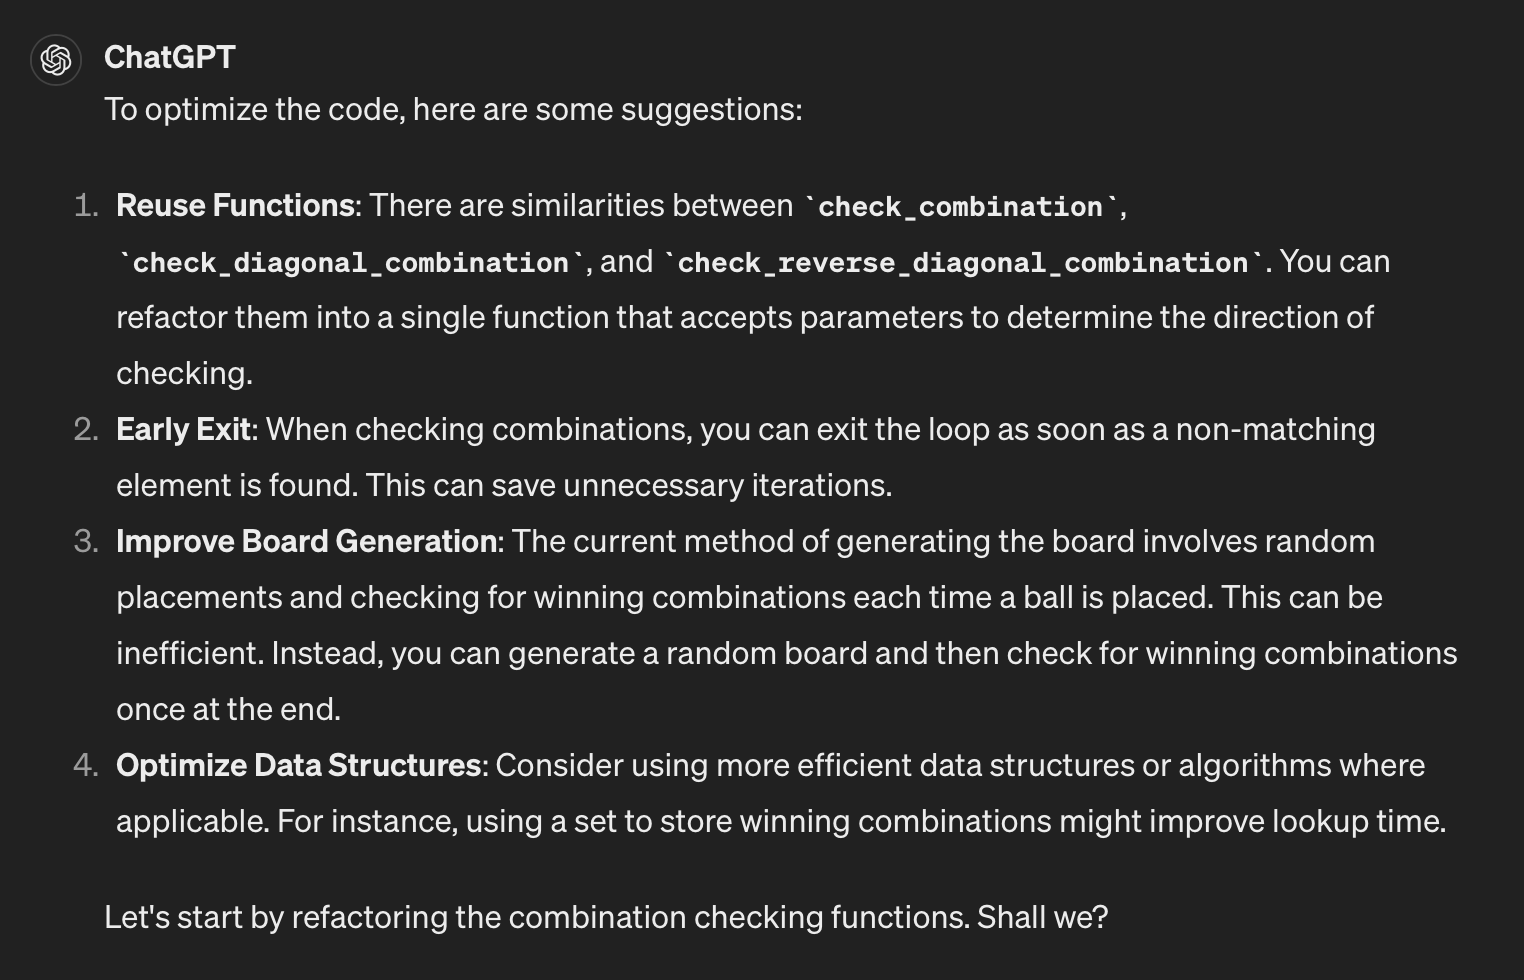

As I wanted to see code i answered yes.

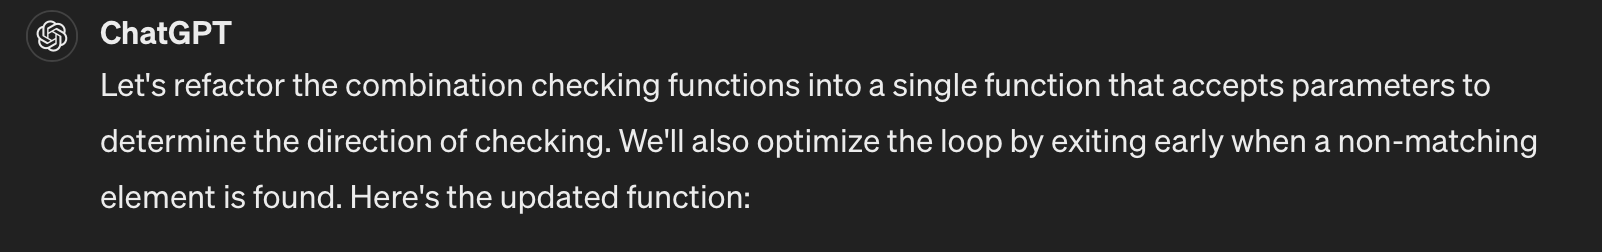
And there was a code below, that I attach

In [5]:
def check_combination(board: list[list], start_row: int, start_col: int, d_row: int, d_col: int, length: int):
    """
    Checks for winning combinations on the board in a specified direction.
    Returns a list with winning combination indexes.

    Args:
    - board (list[list]): The game board.
    - start_row (int): Starting row index.
    - start_col (int): Starting column index.
    - d_row (int): Change in row for each step.
    - d_col (int): Change in column for each step.
    - length (int): Length of the combination to check.

    Returns:
    - list of tuple: List of winning combination indexes.
    """
    item = board[start_row][start_col]
    if item == 0:
        return []

    combination = []
    for i in range(length):
        row = start_row + i * d_row
        col = start_col + i * d_col

        # Check if index is out of bounds
        if row < 0 or row >= len(board) or col < 0 or col >= len(board[0]):
            return []

        if board[row][col] != item:
            return []

        combination.append((col, row))

    return combination


The rest of communication you can read below.
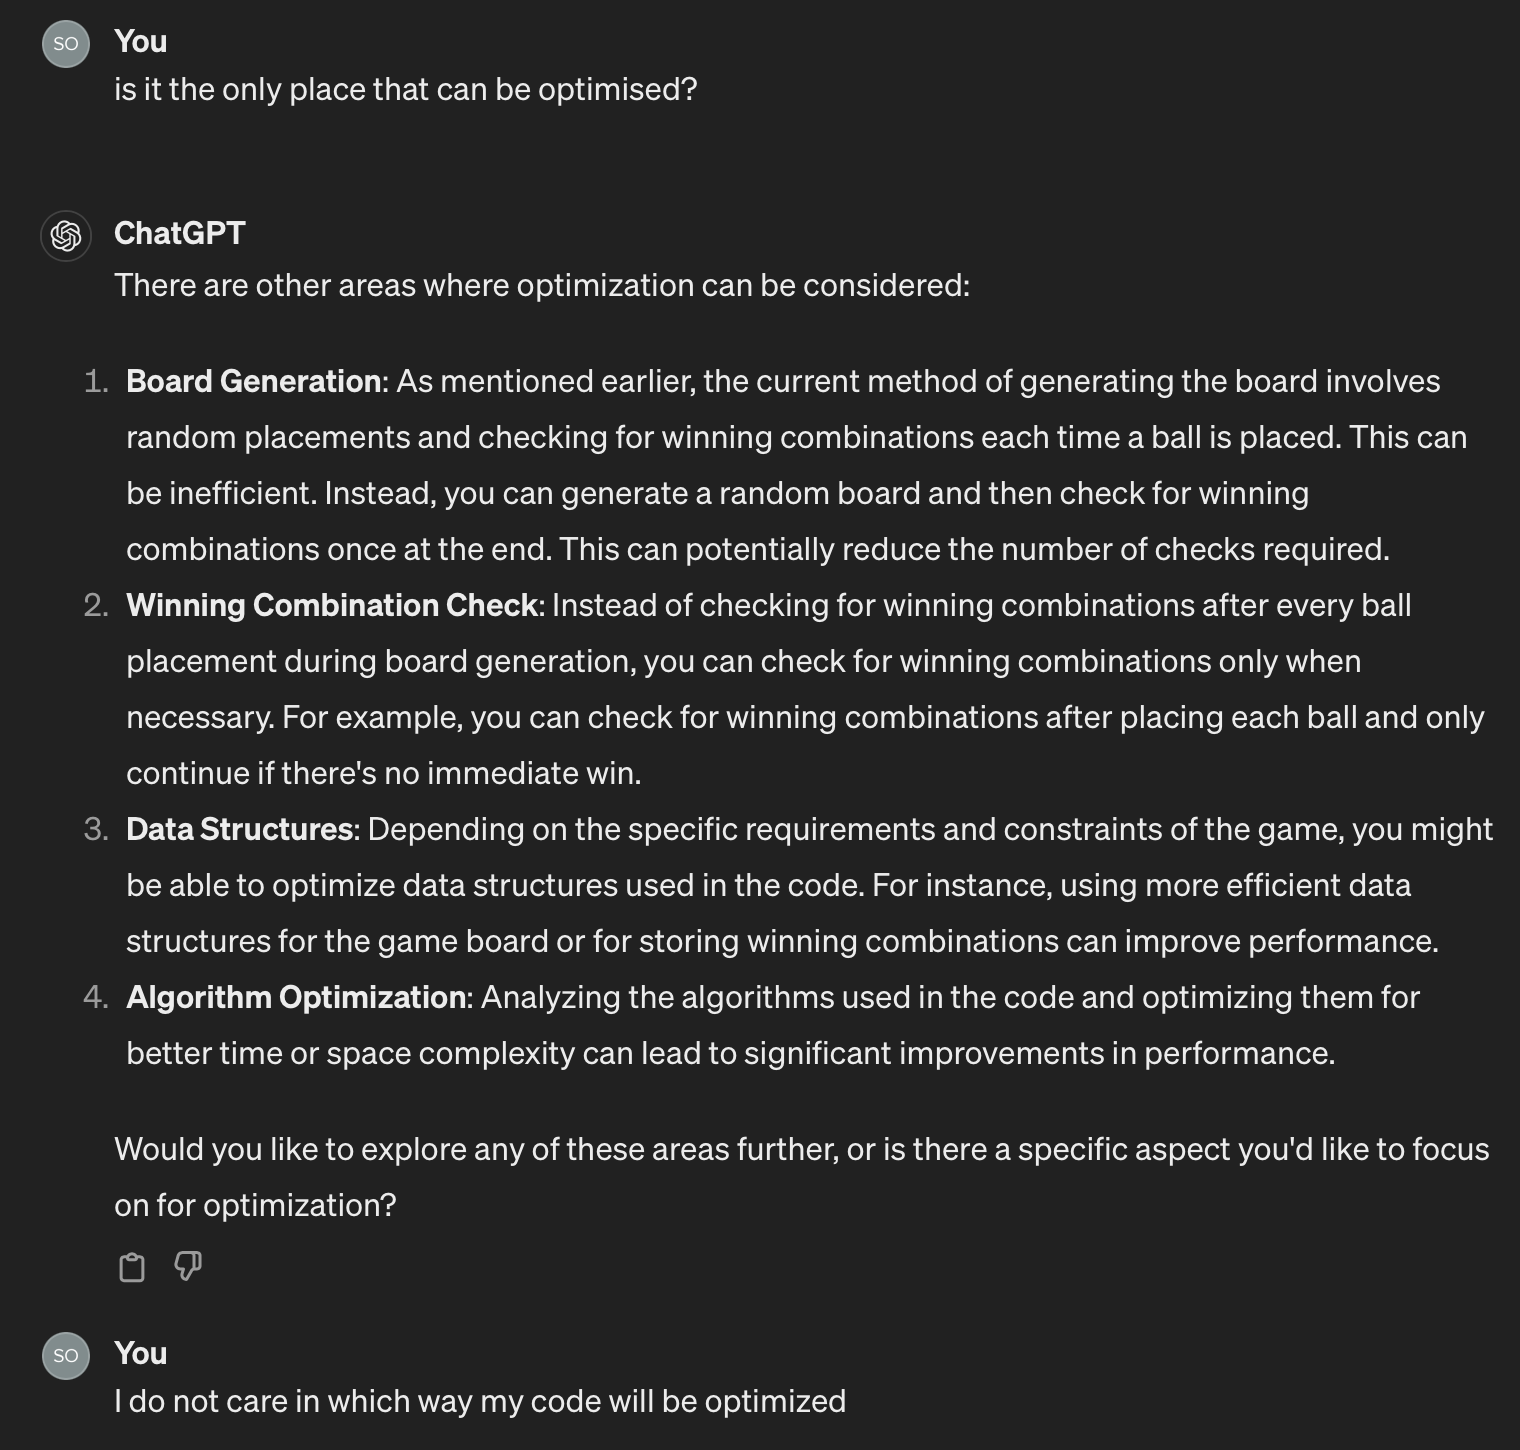
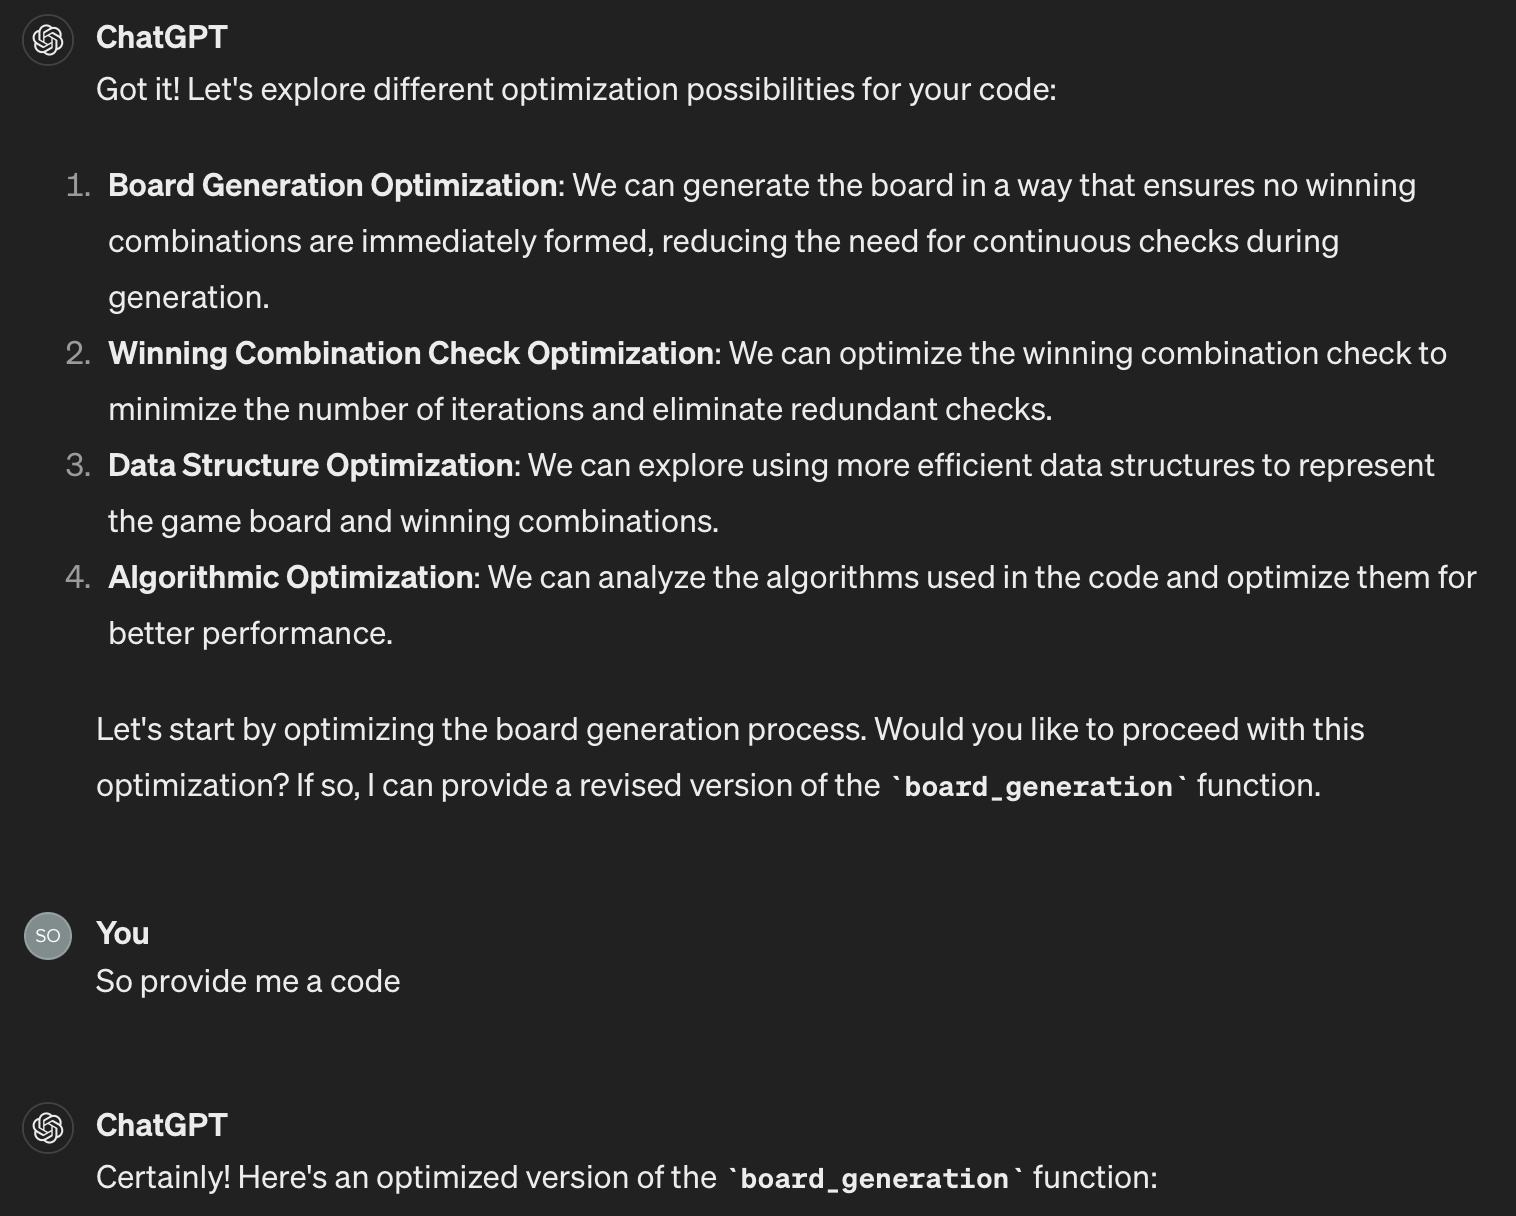
And after this was the code of the optimization of the next function.

In [6]:
def board_generation() -> list[list]:
    """
    Generates a game board of 16 x 4 size, ensuring no immediate winning combinations.
    """
    board = [['0' for _ in range(4)] for _ in range(16)]

    # Define winning combinations that need to be avoided initially
    avoid_combinations = [
        [(0, 0), (1, 0), (2, 0), (3, 0)],  # Horizontal
        [(0, 0), (0, 1), (0, 2), (0, 3)],  # Vertical
        [(0, 0), (1, 1), (2, 2), (3, 3)],  # Diagonal
        [(3, 0), (2, 1), (1, 2), (0, 3)]   # Reverse Diagonal
    ]

    # Place balls randomly while avoiding immediate winning combinations
    for combination in avoid_combinations:
        while True:
            # Randomly select a position
            pos = random.randint(0, 15)
            row, col = pos // 4, pos % 4

            # Check if the position is already occupied
            if board[row][col] == '0':
                break

        # Place balls to avoid winning combination
        for col, row in combination:
            board[row][col] = 'w'

    # Fill the rest of the board randomly
    for row in range(16):
        for col in range(4):
            if board[row][col] == '0':
                board[row][col] = random.choice(['w', 'g'])

    return board


And till the next piece of code was this
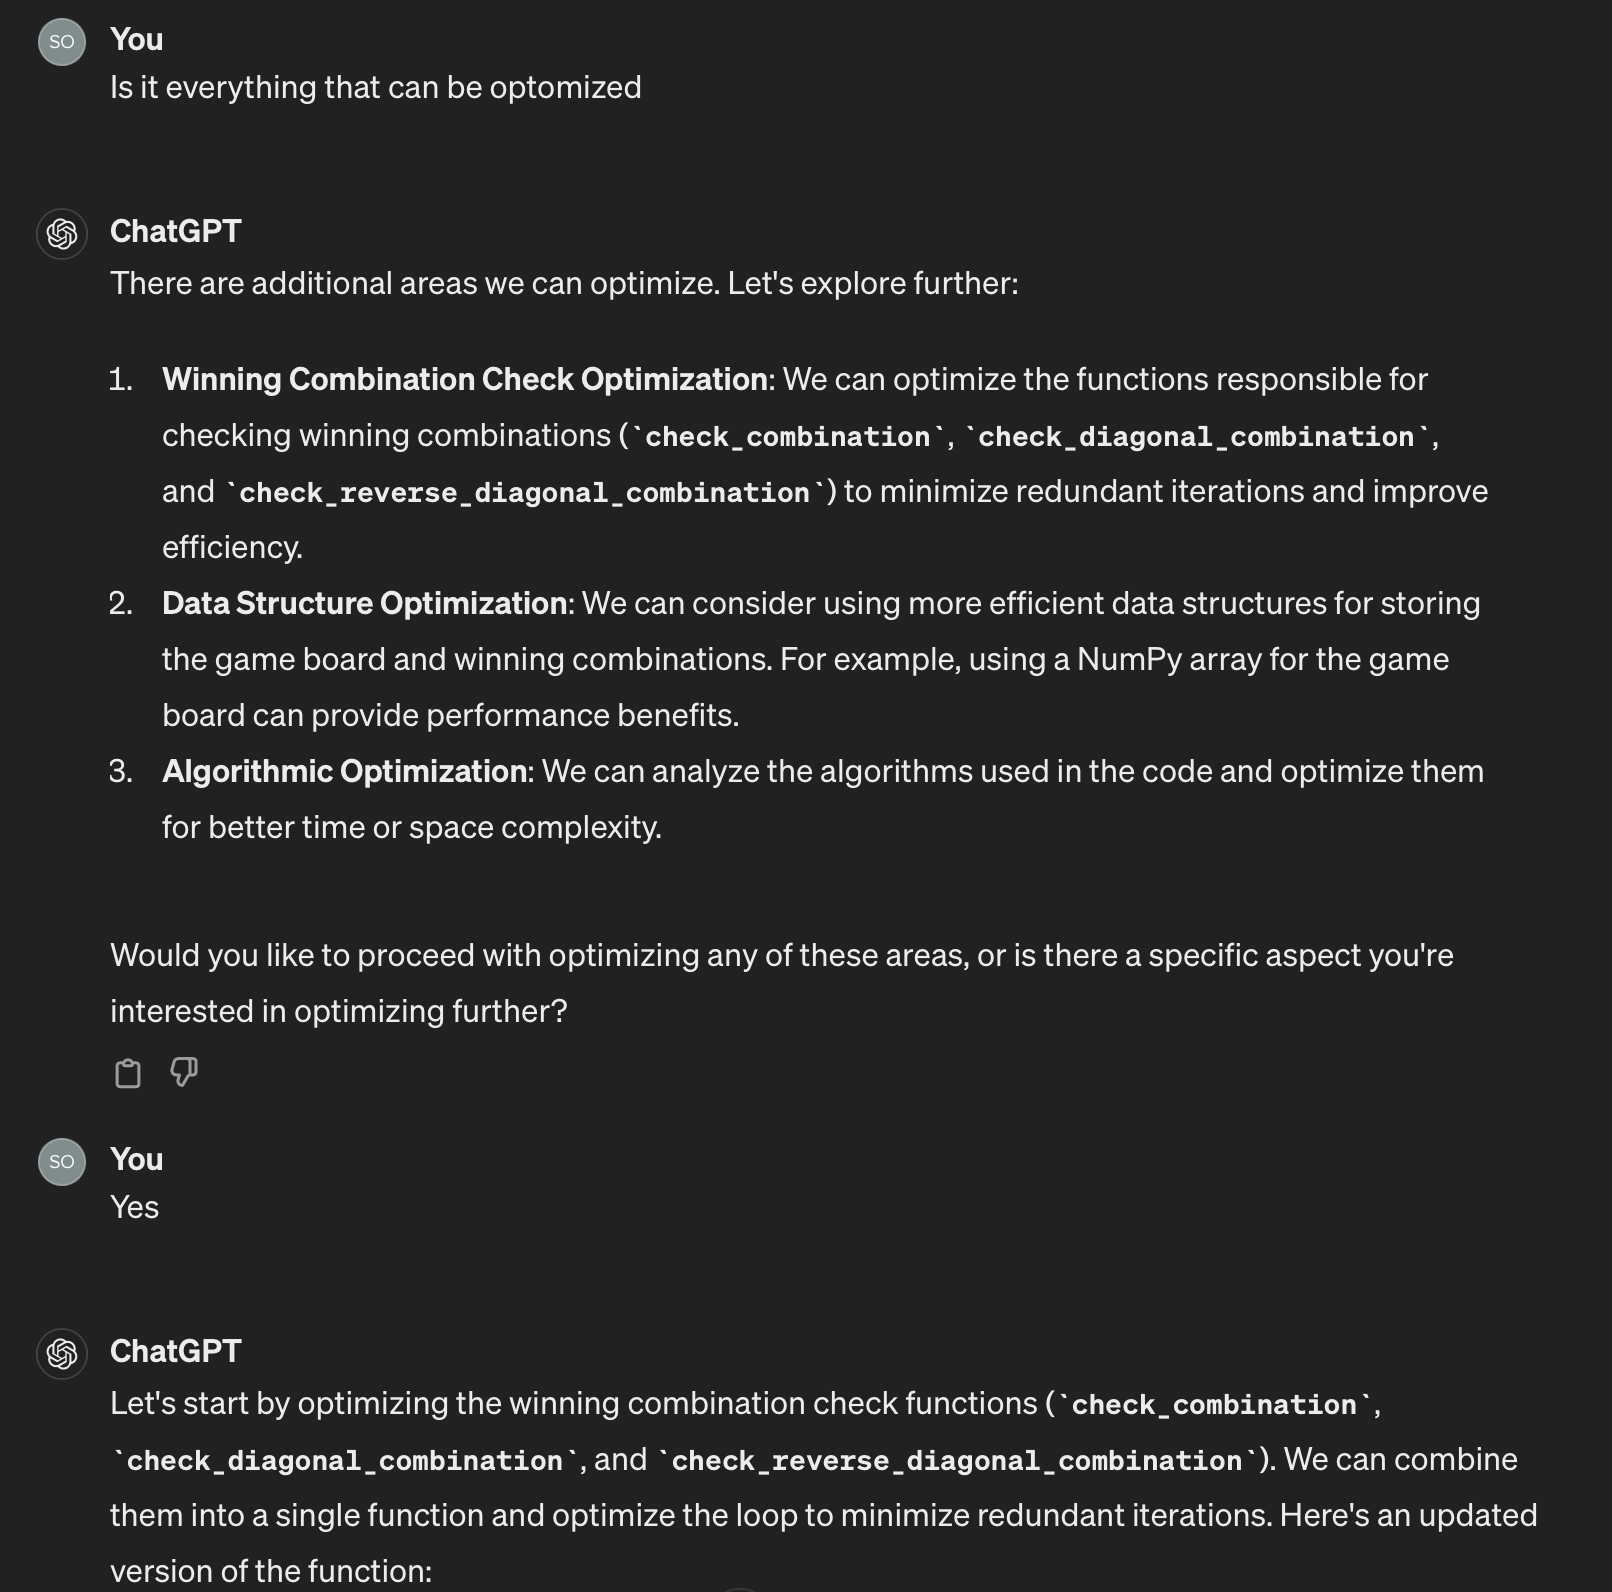
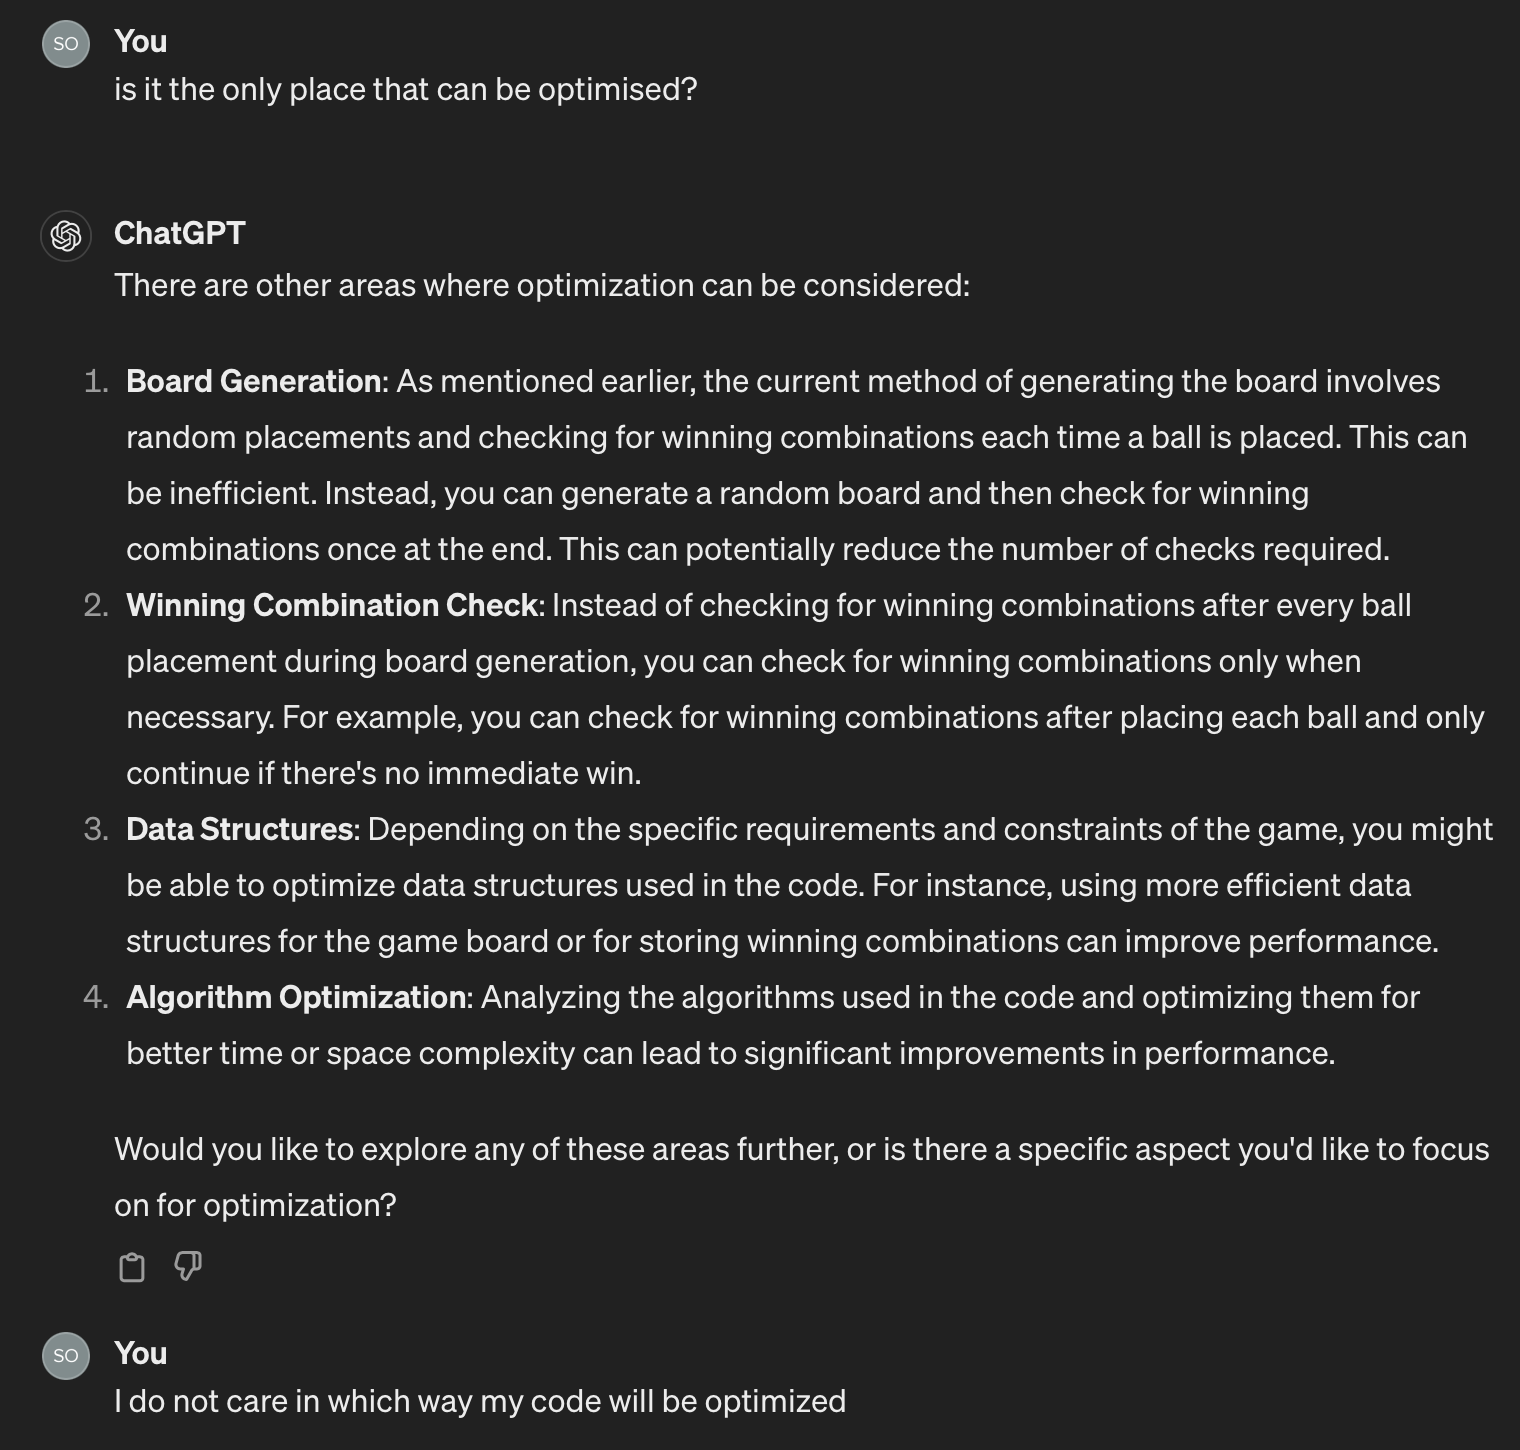

In [7]:
def check_winning_combinations(board: list[list], length: int):
    """
    Checks for winning combinations on the board.
    Returns a list with winning combination indexes.

    Args:
    - board (list[list]): The game board.
    - length (int): Length of the combination to check.

    Returns:
    - list of tuple: List of winning combination indexes.
    """
    winning_combinations = []

    # Horizontal and vertical combinations
    for row in range(len(board)):
        for col in range(len(board[0]) - length + 1):
            if all(board[row][col + i] != '0' for i in range(length)):
                winning_combinations.append([(col + i, row) for i in range(length)])

    for col in range(len(board[0])):
        for row in range(len(board) - length + 1):
            if all(board[row + i][col] != '0' for i in range(length)):
                winning_combinations.append([(col, row + i) for i in range(length)])

    # Diagonal combinations
    for row in range(len(board) - length + 1):
        for col in range(len(board[0]) - length + 1):
            if all(board[row + i][col + i] != '0' for i in range(length)):
                winning_combinations.append([(col + i, row + i) for i in range(length)])

    # Reverse diagonal combinations
    for row in range(length - 1, len(board)):
        for col in range(len(board[0]) - length + 1):
            if all(board[row - i][col + i] != '0' for i in range(length)):
                winning_combinations.append([(col + i, row - i) for i in range(length)])

    return winning_combinations


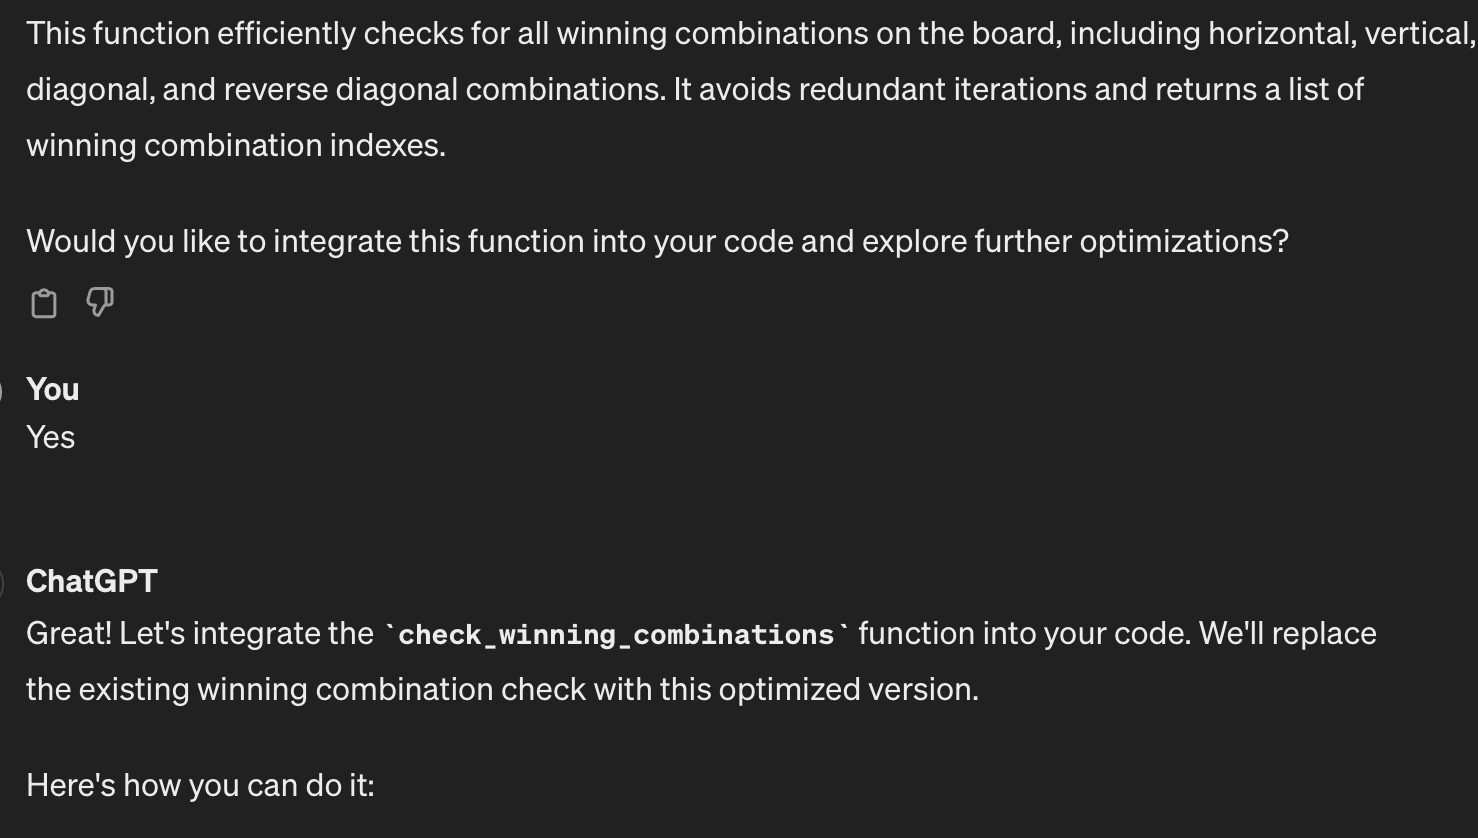

In [8]:
def winning_combination(board: list[list]) -> bool:
    """
    Checks for winning combinations on the board.
    Returns True if there is a winning combination, False otherwise.

    Args:
    - board (list[list]): The game board.

    Returns:
    - bool: True if there is a winning combination, False otherwise.
    """
    winning_combinations = check_winning_combinations(board, 4)
    return len(winning_combinations) > 0, winning_combinations


After this ChatGPT generate the exactly same code as before so I decided to stop and to integrate all of this function to the first code that I send it and to check correctness.

In [9]:
"""
Eternas game
"""
def check_diagonal_combination(board: list[list], hor_index: int):
    """
    (list, int) -> list

    Checks for winning diagonal combinations on the board.
    Returns a list with winning combination indexes.

    >>> check_diagonal_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    []
    >>> check_diagonal_combination([['w', 'g', 'g', 'w'], [0, 'w', 'g', 'g'], [0, 'g', 'w', 'g'], \
['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], [0, 0, 0, 0], \
[0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'], [0, 0, 'g', 'w'], \
[0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    [(0, 0), (1, 1), (2, 2), (3, 3)]
    """
    item = board[hor_index][0]
    if item == 0:
        return []
    combination = []
    for i in range(0, 4):
        if board[(hor_index+i) % len(board)][i] != item:
            return []
        combination.append((i, (hor_index+i) % len(board)))
    return combination
def check_reverse_diagonal_combination(board: list[list], hor_index: int):
    """
    (list, int) -> list

    Checks for winning reverse diagonal combinations on the board.
    Returns a list with winning combination indexes.
    >>> check_reverse_diagonal_combination([['w', 'g', 'g', 'w'], [0, 0, 0, 0], \
[0, 'g', 'w', 'g'], ['g', 'w', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], \
[0, 0, 0, 0], [0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'],\
[0, 0, 'g', 'w'], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    []
    >>> check_reverse_diagonal_combination([['g', 'g', 'g', 'w'], [0, 'g', 'w', 'g'], \
[0, 'w', 'w', 'g'], ['w', 'g', 'w', 'w'], [0, 0, 0, 'g'], [0, 0, 0, 0], [0, 0, 0, 'w'], \
[0, 0, 0, 0], [0, 0, 'w', 'w'], ['w', 'g', 'w', 'g'], [0, 0, 0, 'w'], [0, 0, 0, 'g'],\
[0, 0, 'g', 'w'], [0, 0, 0, 'w'], [0, 0, 'g', 'g'], [0, 0, 0, 'g']], 0)
    [(0, 3), (1, 2), (2, 1), (3, 0)]
    """
    item = board[hor_index][3]
    if item == 0:
        return []
    combination = []
    for i in range(3, -1, -1):
        if board[(hor_index+i) % len(board)][3-i] != item:
            return []
        if hor_index+i >= 0:
            combination.append((3-i, hor_index+i))
        else:
            combination.append((3-i, (16 + i - hor_index) % len(board)))
    return combination




Despite little time optimization that we can see on the graph above, it works almost fully incorrectly.

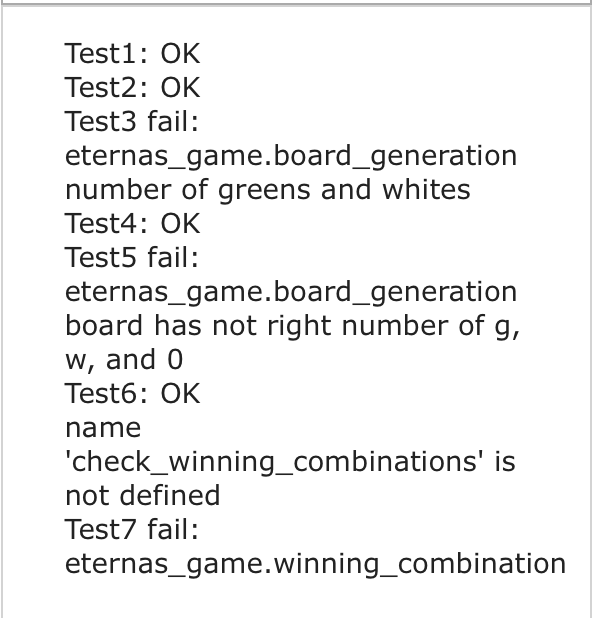

So the next that I discover is optimization by function. I would not provide my requests as i simply write "Please, optimize this function" and send code, so here will be only ChatGPT's responses.

The first optimized function:

In [10]:
def check_combination(board: list[list], hor_index: int, ver_index: int, hor: int, ver: int):
    """
    Checks for winning combinations on the board.
    Returns a list with winning combination indexes.

    Args:
    - board (list[list]): The game board.
    - hor_index (int): Horizontal index to start checking.
    - ver_index (int): Vertical index to start checking.
    - hor (int): Horizontal length of the combination to check.
    - ver (int): Vertical length of the combination to check.

    Returns:
    - list of tuple: List of winning combination indexes.
    """
    item = board[hor_index][ver_index]
    if item == 0:
        return []

    combination = []
    for i in range(hor):
        row = hor_index + i
        if row >= len(board):
            break
        for j in range(ver):
            col = ver_index + j
            if col >= len(board[row]):
                break
            if board[row][col] != item:
                return []
            combination.append((col, row))
    return combination


The second optimized function:

In [11]:
def check_diagonal_combination(board: list[list], hor_index: int):
    """
    Checks for winning diagonal combinations on the board.
    Returns a list with winning combination indexes.

    Args:
    - board (list[list]): The game board.
    - hor_index (int): Horizontal index to start checking.

    Returns:
    - list of tuple: List of winning combination indexes.
    """
    item = board[hor_index][0]
    if item == 0:
        return []

    combination = []
    for i in range(min(len(board) - hor_index, 4)):
        if board[hor_index + i][i] != item:
            return []
        combination.append((i, hor_index + i))
    return combination


Next function:

In [12]:
def check_reverse_diagonal_combination(board: list[list], hor_index: int):
    """
    Checks for winning reverse diagonal combinations on the board.
    Returns a list with winning combination indexes.

    Args:
    - board (list[list]): The game board.
    - hor_index (int): Horizontal index to start checking.

    Returns:
    - list of tuple: List of winning combination indexes.
    """
    item = board[hor_index][3]
    if item == 0:
        return []

    combination = []
    for i in range(min(hor_index + 1, 4)):
        if board[hor_index - i][3 - i] != item:
            return []
        combination.append((3 - i, hor_index - i))
    return combination


Winning_combination function

In [13]:
def winning_combination(board: list[list]) -> bool:
    """
    Checks for winning combinations on the board.
    Returns a bool value of True and all winning positions if there is a winning combination
    or False if not.

    Args:
    - board (list[list]): The game board.

    Returns:
    - bool or tuple: True if there is a winning combination, False otherwise.
      If True, also returns a list of winning combination positions.
    """
    winning_combinations = []

    # Check horizontal and vertical combinations
    for i in range(len(board)):
        for j in range(len(board[i])):
            combination = check_combination(board, i, j, 4, 1)
            if combination:
                winning_combinations.append(combination)

            combination = check_combination(board, i, j, 1, 4)
            if combination:
                winning_combinations.append(combination)

    # Check diagonal combinations
    for i in range(len(board)):
        combination = check_diagonal_combination(board, i)
        if combination:
            winning_combinations.append(combination)

        combination = check_reverse_diagonal_combination(board, i)
        if combination:
            winning_combinations.append(combination)

    return bool(winning_combinations), winning_combinations


And the last one:

In [14]:
import random

def board_generation() -> list[list]:
    """
    Generates a game board of 16 x 4 size.

    Returns:
    - list of list: The generated game board.
    """
    board = [[0] * 4 for _ in range(16)]  # Initialize with all zeros

    # Place balls randomly
    balls_count = random.randint(0, 32)
    colors = ['w', 'g']
    while balls_count > 0:
        row = random.randint(0, 15)
        col = random.randint(0, 3)
        if board[row][col] == 0:
            board[row][col] = random.choice(colors)
            balls_count -= 1

    return board


It is little more optimized that previous ChatGPT's code, but it fails even more tests.

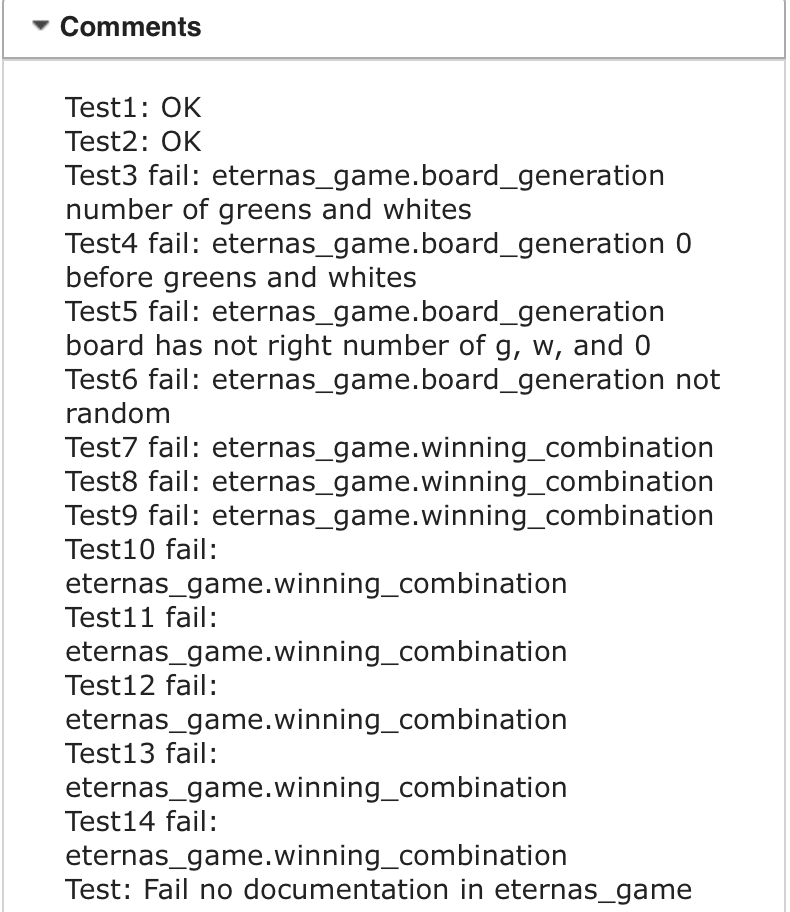

So as we can see by tests that ChatGPT optimize better full code so I would continue to work with it. I simply provide description that we have on cms and get this

In [15]:
import random

def check_combination_chat(board, hor_index, ver_index, hor, ver):
    item = board[hor_index][ver_index]
    if item == 0:
        return []
    combination = []
    for i in range(hor_index, hor_index + hor):
        for j in range(ver_index, ver_index + ver):
            if board[i % len(board)][j] != item:
                return []
            combination.append((j, i % len(board)))
    return combination

def check_diagonal_combination_chat(board, hor_index):
    item = board[hor_index][0]
    if item == 0:
        return []
    combination = []
    for i in range(0, 4):
        if board[(hor_index + i) % len(board)][i] != item:
            return []
        combination.append((i, (hor_index + i) % len(board)))
    return combination

def check_reverse_diagonal_combination_chat(board, hor_index):
    item = board[hor_index][3]
    if item == 0:
        return []
    combination = []
    for i in range(3, -1, -1):
        if board[(hor_index + i) % len(board)][3 - i] != item:
            return []
        if hor_index + i >= 0:
            combination.append((3 - i, hor_index + i))
        else:
            combination.append((3 - i, (16 + i - hor_index) % len(board)))
    return combination

def winning_combination_chat(board):
    winning_combinations = []
    for i in range(0, 16):
        for j in range(0, 4):
            combination = check_combination(board, i, j, 4, 1)
            if combination:
                winning_combinations.append(combination)
        combination = check_combination(board, i, 0, 1, 4)
        if combination:
            winning_combinations.append(combination)
        combination = check_diagonal_combination(board, i)
        if combination:
            winning_combinations.append(combination)
        combination = check_reverse_diagonal_combination(board, i)
        if combination:
            winning_combinations.append(combination)
    if len(winning_combinations) == 0:
        return False
    return True, winning_combinations

def board_generation_chat():
    board = [[0, 0, 0, 0] for _ in range(16)]
    balls_count = random.randint(0, 32)
    ball_color = 'w'
    while balls_count != 0:
        while True:
            pos = random.randint(0, 15)
            ball_pos = 3
            is_success = False
            while ball_pos != 0:
                if board[pos][ball_pos] == 0:
                    board[pos][ball_pos] = ball_color
                    is_success = True
                    break
                ball_pos -= 1
            if is_success:
                break
        balls_count -= 1
        ball_color = 'g' if ball_color == 'w' else 'w'
        if winning_combination(board):
            break
    return board


I fix documentation to not be confused as it costs half of the mark and here are the results.

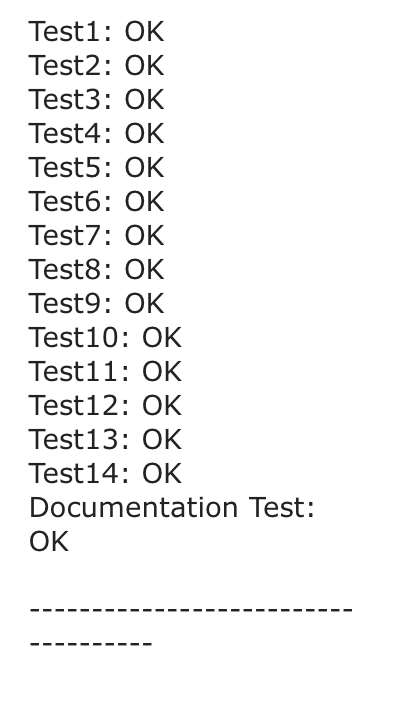

And I decided to do the graph to compare execution time by my code and by Chat GPT's code.

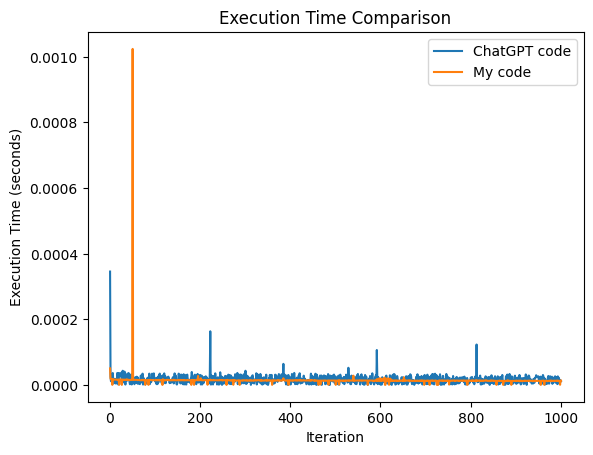

In [19]:
import time
import matplotlib.pyplot as plt

# Initialize lists to store execution times
execution_timesgpt = []
execution_times_your_code = []

for _ in range(1000):
    # Measure time for ChatGPT code
    start_time = time.time()
    board_generation()
    end_time = time.time()
    execution_timegpt = end_time - start_time
    execution_timesgpt.append(execution_timegpt)

    # Measure time for your code
    start_time = time.time()
    board_generation_chat()
    end_time = time.time()
    execution_time_your_code = end_time - start_time
    execution_times_your_code.append(execution_time_your_code)

# Plotting the graph
plt.plot(range(1, 1001), execution_timesgpt, label='ChatGPT code')
plt.plot(range(1, 1001), execution_times_your_code, label='My code')
plt.xlabel('Iteration')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')
plt.legend()
plt.show()
